In [1]:
import pandas as pd

import plotly
import plotly.offline as py
import plotly.graph_objs as go
!pip install plotly_express
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy.ma as ma
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Connect to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Check folder files
%cd "/content/drive/Shareddrives/C23-PS139-ML"
%ls -al


Mounted at /content/drive
/content/drive/Shareddrives/C23-PS139-ML
total 6665
-rw------- 1 root root  105986 Jun 15 08:23  content_based_data.csv
drwx------ 2 root root    4096 May 27 14:59  csv/
drwx------ 2 root root    4096 May 30 12:48  data/
-rw------- 1 root root  711896 Jun 15 14:10  DELETE_destination_recommender_model.h5
-rw------- 1 root root  702680 Jun 15 14:27  destination_recommender_model.h5
-rw------- 1 root root 2673790 Jun 14 14:46  dfs.csv
-rw------- 1 root root     275 May 29 13:30  env.env
-rw------- 1 root root   42028 Jun 15 07:54 'Hotel recommender final_v1.ipynb'
-rw------- 1 root root    1391 Jun 14 09:34  install_chromium_driver.sh
drwx------ 2 root root    4096 May 25 09:07  .ipynb_checkpoints/
-rw------- 1 root root    5022 Jun  9 16:44  keyword_categories.json
-rw------- 1 root root   10848 Jun 15 14:23  keyword_categories_v1.json
drwx------ 2 root root    4096 May 25 08:43  logs/
-rw------- 1 root root  179203 Jun  3 02:13  ner.ipynb
-rw------- 1 root roo

In [3]:
!pip install -Uq google-colab pandas supabase python-dotenv tensorflow_recommenders tensorflow-datasets

In [4]:
from supabase import Client, create_client
from dotenv import load_dotenv
from os import environ

load_dotenv("env.env")
supabase: Client = create_client(
    supabase_url=environ.get("DB_URL"),
    supabase_key=environ.get("DB_KEY")
)

response = supabase.table("gmap_id_2").select("*").execute()
data = response.data


df = pd.DataFrame(data)
dfs = df.copy()
dfs.drop(columns=['id', 'pricing', 'opening_hours'], inplace=True)


In [5]:
df.shape

(2933, 15)

In [6]:
df.head()

,id,name,map_url,img_url,rating,total_review,pricing,address,city,category,about,opening_hours,keyword_category,latitude,longitude
0,fe47e87b-28a9-44e9-ac9f-df2d34136d15,Taman Kebagusan,https://www.google.com/maps/place/Taman+Kebagu...,https://lh5.googleusercontent.com/p/AF1QipOdy9...,4.5,286.0,None,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"{""sampah"": ""12"", ""bermain"": ""11"", ""jogging"": ""...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",{},['tempat wisata'],-6.30102,106.828
1,2cfcfc92-990b-4b2d-a8f6-85328e9d13c6,Inspektorat Daerah Kabupaten Kulon Progo,https://www.google.com/maps/place/Inspektorat+...,https://lh5.googleusercontent.com/p/AF1QipOCL1...,4.1,8.0,None,"45V7+3CW, Jl. Sugiman Gang Bispa, Kemiri, Kec....",Kabupaten Kulon Progo,{},{},{},['kegiatan'],-7.85726,110.164
2,05a6e41a-18dc-4e0b-a154-bd0637cf8c08,Pantai Sentosa Seafood Market,https://www.google.com/maps/place/Pantai+Sento...,https://lh5.googleusercontent.com/p/AF1QipOlbJ...,4.5,2654.0,Sedang,"Jl. Lkr. Luar Barat No.23, RW.1, Kembangan Sel...",Kota Jakarta Barat,"{""sambal"": ""51"", ""diskon"": ""32"", ""makanan_sega...","{""opsi_layanan"": ""antar tanpa bertemu, pesan a...",{},['tempat makan'],-6.18256,106.729
3,45745ad0-935d-4a1a-a834-57a1c93f2b90,Taman kebagusan raya,https://www.google.com/maps/place/Taman+kebagu...,https://lh5.googleusercontent.com/p/AF1QipOlyU...,4.8,4.0,None,"Jl. Kebagusan Raya No.75 H, RT.13/RW.5, Jagaka...",Kota Jakarta Selatan,{},"{""fasilitas"": ""cocok untuk anak-anak""}",{},['tempat wisata'],-6.32608,106.824
4,842874e8-a83a-4402-8d0b-20c47d3243e7,Pulau Ayer,https://www.google.com/maps/place/Pulau+Ayer/d...,https://lh5.googleusercontent.com/p/AF1QipNU_y...,4.6,48.0,None,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,"{""snorkling"": ""4""}",{},{},['kegiatan'],-5.76361,106.583


In [7]:
df = pd.DataFrame(data)
print(df.info())

# Count how many null row per column
null_counts = df.isnull().sum()
empty_dict_counts = df.apply(lambda x: x == "{}").sum()

combined_counts = pd.concat([null_counts, empty_dict_counts ], axis=1)
combined_counts.columns = ['Null Count', 'Empty Dict Count']

# Filter rows where at least one count is not zero
combined_counts = combined_counts[(combined_counts != 0).any(axis=1)]

print(combined_counts)

df.drop(columns=['id', 'map_url', 'img_url', 'pricing', 'opening_hours'], inplace=True)

print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2933 non-null   object 
 1   name              2933 non-null   object 
 2   map_url           2933 non-null   object 
 3   img_url           2897 non-null   object 
 4   rating            2766 non-null   float64
 5   total_review      2766 non-null   float64
 6   pricing           687 non-null    object 
 7   address           2879 non-null   object 
 8   city              2933 non-null   object 
 9   category          2933 non-null   object 
 10  about             2933 non-null   object 
 11  opening_hours     2933 non-null   object 
 12  keyword_category  2932 non-null   object 
 13  latitude          2933 non-null   float64
 14  longitude         2933 non-null   float64
dtypes: float64(4), object(11)
memory usage: 343.8+ KB
None
                  Null Count  Empt

In [8]:
import ast
from collections import Counter

df_2 = df.copy()
df_2['category'] = df_2['category'].apply(ast.literal_eval)
counter = Counter(key for row in df_2['category'] for key in row.keys())
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))


df_category = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df_category.columns = ['kategori', 'jumlah']

len(list(df_category.query('jumlah > 1').kategori.unique()))

1558

In [9]:
import json

# --- READ from file ---
with open('keyword_categories.json') as f:
    keyword_categories = json.load(f)

In [10]:
keyword_categories = {
    'aktivitas_air': ['kolam_ikan', 'lumpur', 'snorkeling', 'snorkling'],
    'alam': ['gunung', 'pantai', 'tumbuhan'],
    'alam_terbuka': ['awan_panas', 'lumpur', 'snorkeling', 'snorkling'],
    'bersejarah': ['gedung', 'kolonial', 'lingkungan', 'masjid', 'penjajahan', 'sejarah', 'gamelan', 'sejarah_indonesia', 'proklamasi_kemerdekaan_indonesia'],
    'daging': ['ayam', 'ayam_bakar', 'ayam_geprek', 'ayam_kampung', 'ayam_pop', 'daging_kambing', 'kelinci', 'ikan_bakar', 'kakap', 'ikan', 'sapi'],
    'edukasi': ['auditorium', 'budaya', 'diorama', 'mahasiswa', 'perpustakaan'],
    'estetik': ['aesthetic', 'alami', 'foto', 'minimalis', 'taman'],
    'fasilitas': ['ac', 'parkir', 'toilet', 'wifi'],
    'fotogenik': ['arsitek', 'foto', 'fotogenik'],
    'gunung': ['awan_panas', 'gunung_merapi', 'tebing'],
    'halal': ['halal', 'syariah'],
    'hemat_biaya': ['food_court', 'warung'],
    'hiburan': ['konser', 'pertunjukan'],
    'indoor': ['bioskop', 'galeri_seni', 'hotel', 'kafe', 'karaoke', 'mall', 'museum', 'restoran', 'ruang_pameran', 'ruang_serbaguna', 'ruang_tunggu', 'studio', 'teater', 'toko_buku'],
    'kebersihan': ['kebersihan'],
    'kegiatan_rekreasi': ['acara', 'hiburan', 'perjalanan', 'permainan'],
    'kemah': ['kemah', 'tenda'],
    'kenyamanan': ['homestay', 'kamar_mandi', 'nyaman', 'sejuk'],
    'kuliner': ['ayam_bakar', 'batik', 'gorengnya', 'gula_batu', 'jamur', 'kopi', 'lidah', 'makan_siang'],
    'lokasi': ['desa', 'gunung', 'pantai', 'pedesaan', 'pegunungan', 'pulau', 'puncak', 'strategis'],
    'makanan': ['sop_iga', 'ayam', 'ayam_bakar', 'ayam_geprek', 'ayam_kampung', 'ayam_pop', 'bacem', 'bakso', 'bambu', 'bebek', 'bubur', 'bubur_ayam', 'bumbu', 'capcay', 'cumi', 'daging_kambing', 'es_pisang_ijo', 'goreng', 'gudeg', 'gulai', 'gurame', 'iga', 'ikan', 'ikan_bakar', 'jamur', 'kakap', 'kelinci', 'kerang', 'ketupat', 'kuahnya', 'lalapan', 'lontong', 'mangut_lele', 'mendoan', 'mie_goreng', 'nasi', 'nasi_campur', 'nasi_goreng', 'nasi_kuning', 'nila', 'pangsit', 'pecel', 'pisang', 'pizza', 'rendang', 'sambal_matah', 'sambel', 'sarapan', 'sate', 'sate_klatak', 'sayur', 'seafood', 'soto_ayam', 'siomay', 'sop', 'sop_buntut', 'soto', 'tahu', 'tekwan', 'telur', 'tempe', 'tengkleng', 'tomyam'],
    'makanan_chinese': ["chinese", "dimsum", "wonton", "xiaolongbao"],
    'makanan_hari': ['makan_siang', 'sarapan'],
    'makanan_jepang': ['chicken_katsu', 'salmon', 'sushi', 'teriyaki', 'makanan_jepang'],
    'makanan_tradisional': ["betawi", "jawa", "khas", "nusantara", "rendang", "tradisional"],
    'makanan_western': ["grill", "hamburger", "pizza", "steak" "western"],
    'malam_hari': ['diskusi', 'hiburan', 'karaoke', 'live_music', 'malam', 'music'],
    'minuman': ['es_teh', 'kopi', 'minuman', 'sop', 'es_buah', 'es_campur', 'es_kelapa'],
    'outdoor': ['aktivitas_air', 'alam', 'bersepeda', 'busway', 'danau', 'downhill', 'golf_mini', 'gunung', 'hutan', 'jembatan', 'jogging', 'lumpur', 'mancing', 'outbound', 'pantai', 'picnic', 'piknik', 'pohon_beringin', 'pulau', 'sawah', 'snorkeling', 'sungai', 'sunset', 'taman_air', 'taman_bermain', 'taman_bunga', 'taman_hewan', 'taman_kota', 'taman_laut', 'taman_nasional', 'taman_rekreasi', 'taman_tema', 'tebing'],
    'pagi_hari': ['pagi', 'sarapan', 'sarapan_pagi'],
    'pantai': ['ombak', 'pantai'],
    'pedas': ['pedas', 'sambal', 'sambel'],
    'pelayanan': ['kasir', 'pelayanan', 'pemandu'],
    'pemandangan_alam': ['alam', 'danau', 'gunung', 'hutan', 'jembatan', 'pantai', 'pemandangan', 'pulau', 'sawah', 'sungai', 'sunset', 'tebing'],
    'pemandangan_indah': ['alami', 'kandang', 'patung', 'rindang', 'taman', 'teras'],
    'pemandangan_luas': ['view'],
    'pertemuan': ['meeting', 'rapat', 'seminar'],
    'ramah_anak': ['anak', 'keluarga', 'mainan', 'playground', 'ramah_anak'],
    'rekreasi': ['arung_jeram', 'bermain', 'jogging', 'mancing', 'olahraga', 'outbond', 'playground', 'rekreasi', 'snorkeling', 'tiket', 'snorkling'],
    'relaksasi': ['ayunan', 'bangku', 'gazebo', 'kolam_renang', 'santai'],
    'rumah': ['homestay', 'pengalaman', 'perumahan', 'rumah'],
    'salon': ['perm', 'spa', 'waxing', ],
    'sepeda_motor': ['kendaraan', 'motor'],
    'smoking': ['smoking', 'smoking_area'],
    'tempat_bermain': ['aktivitas_air', 'alam', 'bermain', 'danau', 'gunung', 'hutan', 'jembatan', 'jogging', 'mancing', 'outbond', 'pantai', 'picnic', 'rekreasi', 'sawah', 'snorkeling', 'sungai', 'sunset', 'tebing'],
    'tempat_ibadah': ['altar', 'doa', 'sholat', 'sunnah', 'umat', 'wudhu', 'ibadah', 'tempat_ibadah', 'masjid', 'gereja', 'pura'],
    'tempat_makan': ['masakannya', 'all_you_can_eat', 'ayam', 'bakso', 'bubur', 'cafe', 'capcay', 'cumi', 'goreng', 'gudeg', 'gulai', 'gurame', 'hidangan', 'iga', 'ikan', 'jahe', 'jamur', 'kelinci', 'kerang', 'kuahnya', 'lalapan', 'lauk', 'lontong', 'makanan', 'masakan', 'mendoan', 'mie_aceh', 'mie_ayam', 'mie_goreng', 'nasi', 'nasi_campur', 'nasi_goreng', 'nasi_mandi', 'nila', 'pangsit', 'pedas', 'pisang', 'rendang', 'resepsi', 'rica', 'sambal', 'sarapan', 'sate', 'sayur', 'siomay', 'snack', 'sop', 'soto', 'tahu', 'telur', 'tempe', 'tengkleng', 'truffle'],
    'tempat_ngumpul': ['tempat_hangout', 'tempat_ngumpul', 'cafe'],
    'tempat_piknik': ['picnic', 'piknik', 'rekreasi'],
    'tempat_wisata': ['liburan', 'aktivitas_air', 'alam', 'bermain', 'bersejarah', 'fotogenik', 'gedung', 'gunung', 'hutan', 'jembatan', 'jogging', 'kandang', 'kegiatan', 'kolam_ikan', 'lingkungan', 'mancing', 'masjid', 'olahraga', 'outbond', 'pantai', 'patung', 'pemandangan', 'pencakar_langit', 'picnic', 'pulau', 'rekreasi', 'sejarah', 'snorkeling', 'sungai', 'sunset', 'taman', 'tebing', 'tempat_bermain', 'tempat_makan', 'teras', 'view'],
    'terbit_matahari': ['sunrise'],
    'tradisional': ['budaya', 'khas', 'tradisional', 'gamelan'],
    'transportasi': ['bus', 'kapal', 'kereta', 'pesawat', 'sepeda_motor']
}

interests = {
    'rumah_makan': ['restoran', 'kuliner', 'tempat_makan'],
    'makanan_western': ['western', 'grill', 'steak', 'hamburger', 'pizza'],
    'makanan_chinese': ['chinese', 'dimsum', 'noodles', 'wonton'],
    'makanan_tradisional': ['tradisional', 'nusantara', 'khas', 'betawi', 'jawa'],
    'makanan_jepang': ['jepang', 'sushi', 'ramen', 'tempura'],
    'tempat_bersejarah': ['bersejarah', 'sejarah', 'cagar_budaya'],
    'budaya': ['budaya', 'tradisi', 'seni', 'adat_istiadat', 'festival_film', 'keraton_yogyakarta'],
    'tempat_main': ['hiburan', 'main', 'taman_bermain', 'permainan', 'bermain'],
    'ramah_anak_anak': ['ramah_anak', 'playground', 'area_anak'],
    'alam': ['alam', 'hutan', 'gunung', 'taman', 'kebun', 'hutan_lindung', 'hutan_kota'],
    'outdoor': ['outdoor', 'aktivitas_luar', 'petualangan', 'hutan_kota'],
    'indoor': ['indoor', 'aktivitas_dalam_ruangan'],
    'pantai': ['pantai', 'pesisir', 'beach', 'pantai_pasir_putih'],
    'olahraga': ['olahraga', 'aktivitas_olahraga', 'fitness', 'gym', 'arena_olahraga'],
    'pemandangan': ['pemandangan', 'view', 'panorama', 'scenery'],
    'foto': ['foto', 'photography', 'fotografi', 'spot_foto'],
    'tradisional': ['tradisional', 'kuno', 'warisan', 'kearifan_lokal'],
    'musik': ['musik', 'konser', 'festival', 'band', 'music'],
    'fasilitas': ['fasilitas', 'layanan', 'pelayanan', 'sarana'],
}

for key, value in interests.items():
    if key in keyword_categories:
        value += keyword_categories[key]
        value = list(set(value))
    keyword_categories[key] = value

for key, values in keyword_categories.items():
    values = [value.replace(" ", "_").lower().strip() for value in values]
    keyword_categories[key] = values


import collections

# Sort the dictionary by keys
keyword_categories = collections.OrderedDict(sorted(keyword_categories.items()))

# Sort the values (lists) in the dictionary
for key, value in keyword_categories.items():
    sorted_value = sorted(value)
    keyword_categories[key] = []
    keyword_categories[key] = sorted_value

print(dict(keyword_categories))

with open('keyword_categories_v1.json', 'w+') as f:
    f.write(json.dumps(keyword_categories, indent=4))

{'aktivitas_air': ['kolam_ikan', 'lumpur', 'snorkeling', 'snorkling'], 'alam': ['alam', 'gunung', 'hutan', 'hutan_kota', 'hutan_lindung', 'kebun', 'pantai', 'taman', 'tumbuhan'], 'alam_terbuka': ['awan_panas', 'lumpur', 'snorkeling', 'snorkling'], 'bersejarah': ['gamelan', 'gedung', 'kolonial', 'lingkungan', 'masjid', 'penjajahan', 'proklamasi_kemerdekaan_indonesia', 'sejarah', 'sejarah_indonesia'], 'budaya': ['adat_istiadat', 'budaya', 'festival_film', 'keraton_yogyakarta', 'seni', 'tradisi'], 'daging': ['ayam', 'ayam_bakar', 'ayam_geprek', 'ayam_kampung', 'ayam_pop', 'daging_kambing', 'ikan', 'ikan_bakar', 'kakap', 'kelinci', 'sapi'], 'edukasi': ['auditorium', 'budaya', 'diorama', 'mahasiswa', 'perpustakaan'], 'estetik': ['aesthetic', 'alami', 'foto', 'minimalis', 'taman'], 'fasilitas': ['ac', 'fasilitas', 'layanan', 'parkir', 'pelayanan', 'sarana', 'toilet', 'wifi'], 'foto': ['foto', 'fotografi', 'photography', 'spot_foto'], 'fotogenik': ['arsitek', 'foto', 'fotogenik'], 'gunung': [

In [11]:
import ast

df_3 = df.copy()

# Remove the "counter" for each categories
df_3['category'] = df_3['category'].apply(ast.literal_eval)
df_3['category'] = df_3['category'].apply(lambda x: list(x.keys()))

# Generalize review categories based on keyword_categories above
df_3.insert(loc=df_3.columns.get_loc('category') + 1, column='general_category', value='')
df_3['general_category'] = df_3['category'].apply(lambda x: [key for key, values in keyword_categories.items() if any(val in values for val in x)])

df_3['general_length'] = df_3['general_category'].apply(len)
df_3[["name", "category", "general_category", "general_length", "rating", "total_review"]].query('total_review > 0 and category.str.len() > 0 and rating > 4.5')

,name,category,general_category,general_length,rating,total_review
4,Pulau Ayer,[snorkling],"[aktivitas_air, alam_terbuka, rekreasi]",3,4.6,48.0
6,Arka Coffee and Space,"[toko_buku, taman, standar, kerja, strategis, ...","[alam, estetik, fasilitas, indoor, lokasi, pem...",8,4.9,361.0
18,Pesanggrahan Rejawinangun,"[parkir, foto]","[estetik, fasilitas, foto, fotogenik]",4,4.6,72.0
22,Pantai Sunrise,[pulau],"[lokasi, outdoor, pemandangan_alam, tempat_wis...",4,4.6,19.0
29,HOLEO Golf & Museum,"[golf_mini, seru, kesenangan, bermain, tote_ba...","[outdoor, rekreasi, tempat_bermain, tempat_mai...",5,4.9,827.0
...,...,...,...,...,...,...
2919,Lesehan Pak Bowo,"[sambel, empuk, gurih, bumbunya, gorengnya, ba...","[kuliner, makanan, pedas]",3,4.6,317.0
2920,Masjid Al-Ishlah,"[luas, sekolah, sholat]",[tempat_ibadah],1,4.6,70.0
2921,Masjid Pangeran Diponegoro Balaikota,"[ac, wudhu, ibadah, lantai, lingkungan, kantor...","[bersejarah, fasilitas, tempat_ibadah, tempat_...",4,4.8,699.0
2924,Pawon Joglo,"[harga, masakan]",[tempat_makan],1,4.6,113.0


In [12]:
df_4 = df_3.copy()

df_4['about'] = df_4['about'].apply(ast.literal_eval)
df_about = pd.json_normalize(df_4['about'])
df_about.columns = df_about.columns.str.lower().str.replace(' ', '_')


In [13]:
total_rows = len(df_about)

null_counts = df_about.isnull().sum().sort_values()
null_percentage = (null_counts / total_rows) * 100

print("NULL values in 'about' column")
for column, count in null_counts.items():
    percentage = null_percentage[column]
    print(f"{column:20}: {count} / {total_rows} ({percentage:.2f}%)")

NULL values in 'about' column
fasilitas           : 1123 / 2933 (38.29%)
opsi_layanan        : 1708 / 2933 (58.23%)
no_aksesibilitas    : 1757 / 2933 (59.90%)
suasana             : 1800 / 2933 (61.37%)
pilihan_makan       : 1818 / 2933 (61.98%)
penawaran           : 1820 / 2933 (62.05%)
tipe_pengunjung     : 1909 / 2933 (65.09%)
pembayaran          : 2067 / 2933 (70.47%)
perencanaan         : 2276 / 2933 (77.60%)
description         : 2409 / 2933 (82.13%)
aksesibilitas       : 2471 / 2933 (84.25%)
keunggulan          : 2727 / 2933 (92.98%)
no_opsi_layanan     : 2887 / 2933 (98.43%)
no_fasilitas        : 2890 / 2933 (98.53%)
dari_bisnis         : 2898 / 2933 (98.81%)
aktivitas           : 2918 / 2933 (99.49%)
rute                : 2931 / 2933 (99.93%)
pendaurulangan      : 2932 / 2933 (99.97%)
populer_untuk       : 2932 / 2933 (99.97%)


In [14]:
df_about_split = df_about.applymap(lambda x: x.split(',') if isinstance(x, str) else x)
df_about_split

,aksesibilitas,fasilitas,opsi_layanan,penawaran,pilihan_makan,suasana,tipe_pengunjung,perencanaan,no_aksesibilitas,pembayaran,description,no_opsi_layanan,keunggulan,no_fasilitas,dari_bisnis,rute,aktivitas,pendaurulangan,populer_untuk
0,[pintu masuk khusus pengguna kursi roda],"[cocok untuk anak-anak, perosotan, toilet umum]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[kursi khusus pengguna kursi roda, pintu masu...","[cocok untuk anak-anak, toilet]","[antar tanpa bertemu, pesan antar, bawa pula...","[kopi, makanan halal]","[sarapan, brunch, makan siang, makan malam,...",[santai],[berkelompok],[menerima reservasi],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,[cocok untuk anak-anak],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,NaN,"[cocok untuk anak-anak, toilet]","[bawa pulang, makan di tempat]","[kopi, makanan halal, menu untuk anak-anak]","[sarapan, brunch, makan siang, katering]","[nyaman, santai]",[berkelompok],[menerima reservasi],"[kursi khusus pengguna kursi roda, pintu masu...",[hanya tunai],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2930,NaN,"[cocok untuk anak-anak, toilet]","[bawa pulang, makan di tempat]","[kopi, makanan halal, menu untuk anak-anak]","[makan siang, makan malam, hidangan penutup]","[nyaman, santai]",[berkelompok],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2931,NaN,[cocok untuk anak-anak],"[tempat duduk di area terbuka, bawa pulang, ...","[hidangan larut malam, kopi, makanan halal]","[makan malam, tempat duduk]","[nyaman, santai]",[berkelompok],NaN,"[kursi khusus pengguna kursi roda, pintu masu...",[hanya tunai],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
column_stats = df_about.describe(include='all').transpose()
column_stats

,count,unique,top,freq
aksesibilitas,462,27,"pintu masuk khusus pengguna kursi roda, tempat...",168
fasilitas,1810,85,cocok untuk anak-anak,668
opsi_layanan,1225,43,"bawa pulang, makan di tempat",310
penawaran,1113,189,"kopi, makanan halal",264
pilihan_makan,1115,75,"makan siang, makan malam",148
suasana,1133,7,"nyaman, santai",904
tipe_pengunjung,1024,3,berkelompok,770
perencanaan,657,7,menerima reservasi,609
no_aksesibilitas,1176,24,"pintu masuk khusus pengguna kursi roda, tempat...",321
pembayaran,866,24,hanya tunai,482


In [16]:
info_dict = {}
for col in df_about_split.columns:
    val_set = set()
    values = df_about[col].unique()
    for val in values:
        if isinstance(val, float):
            continue
        for v in val.split(','):
            val_set.add(v.strip())
    info_dict[col] = {"Unique values": list(val_set), "Length": len(val_set)}

df_column_info = pd.DataFrame(info_dict).T.reset_index()
df_column_info.sort_values(by='Length', inplace=True, ascending=False, ignore_index=True)
df_column_info.columns = ['Column', 'Unique Values', 'Length']

df_column_info

,Column,Unique Values,Length
0,description,"[pakaian & aksesori olahraga untuk pria, peral...",1017
1,penawaran,"[makanan, layanan perbaikan, makanan halal, va...",24
2,fasilitas,"[toilet umum, restoran, lapangan voli, toilet,...",16
3,opsi_layanan,"[antar tanpa bertemu, belanja di toko, ambil d...",13
4,keunggulan,"[musik live, pertunjukan live, perapian, tempa...",9
5,aksesibilitas,"[tempat parkir khusus pengguna kursi roda, pin...",8
6,pilihan_makan,"[katering, brunch, makan malam, hidangan penut...",8
7,pembayaran,"[pembayaran nfc dengan ponsel, kartu debit, ha...",7
8,perencanaan,"[janji temu diperlukan untuk tes covid, diperl...",6
9,no_aksesibilitas,"[tempat parkir khusus pengguna kursi roda, pin...",5


In [17]:
df.head()

,name,rating,total_review,address,city,category,about,keyword_category,latitude,longitude
0,Taman Kebagusan,4.5,286.0,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"{""sampah"": ""12"", ""bermain"": ""11"", ""jogging"": ""...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['tempat wisata'],-6.30102,106.828
1,Inspektorat Daerah Kabupaten Kulon Progo,4.1,8.0,"45V7+3CW, Jl. Sugiman Gang Bispa, Kemiri, Kec....",Kabupaten Kulon Progo,{},{},['kegiatan'],-7.85726,110.164
2,Pantai Sentosa Seafood Market,4.5,2654.0,"Jl. Lkr. Luar Barat No.23, RW.1, Kembangan Sel...",Kota Jakarta Barat,"{""sambal"": ""51"", ""diskon"": ""32"", ""makanan_sega...","{""opsi_layanan"": ""antar tanpa bertemu, pesan a...",['tempat makan'],-6.18256,106.729
3,Taman kebagusan raya,4.8,4.0,"Jl. Kebagusan Raya No.75 H, RT.13/RW.5, Jagaka...",Kota Jakarta Selatan,{},"{""fasilitas"": ""cocok untuk anak-anak""}",['tempat wisata'],-6.32608,106.824
4,Pulau Ayer,4.6,48.0,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,"{""snorkling"": ""4""}",{},['kegiatan'],-5.76361,106.583


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2933 non-null   object 
 1   rating            2766 non-null   float64
 2   total_review      2766 non-null   float64
 3   address           2879 non-null   object 
 4   city              2933 non-null   object 
 5   category          2933 non-null   object 
 6   about             2933 non-null   object 
 7   keyword_category  2932 non-null   object 
 8   latitude          2933 non-null   float64
 9   longitude         2933 non-null   float64
dtypes: float64(4), object(6)
memory usage: 229.3+ KB


In [19]:
df.describe()

,rating,total_review,latitude,longitude
count,2766.000000,2766.000000,2933.000000,2933.000000
mean,4.451193,1832.410340,-7.098326,108.790634
std,0.348477,6274.961001,0.848380,1.802430
min,1.000000,1.000000,-8.199570,106.441000
25%,4.300000,61.000000,-7.836030,106.824000
50%,4.500000,343.500000,-7.714400,110.217000
75%,4.600000,1300.500000,-6.191010,110.387000
max,5.000000,147572.000000,-2.445650,117.889000


In [20]:
df.describe(include=['object'])

,name,address,city,category,about,keyword_category
count,2933,2879,2933,2933,2933,2932
unique,2895,2825,11,1879,1536,13
top,Warung Makan,"Jl. Pantai Sel. Jawa, Pantai, Tepus, Kec. Tepu...",Kabupaten Gunung Kidul,{},{},['tempat makan']
freq,8,5,386,994,834,1131


In [21]:
# mengecek nilai null
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

# Content based user's preference destination recommendation

In [22]:
df_coba_3 = df_3.copy()
df_coba_3.head()

,name,rating,total_review,address,city,category,general_category,about,keyword_category,latitude,longitude,general_length
0,Taman Kebagusan,4.5,286.0,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"[sampah, bermain, jogging, olahraga, warga, so...","[fasilitas, kenyamanan, olahraga, outdoor, pag...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['tempat wisata'],-6.30102,106.828,9
1,Inspektorat Daerah Kabupaten Kulon Progo,4.1,8.0,"45V7+3CW, Jl. Sugiman Gang Bispa, Kemiri, Kec....",Kabupaten Kulon Progo,[],[],{},['kegiatan'],-7.85726,110.164,0
2,Pantai Sentosa Seafood Market,4.5,2654.0,"Jl. Lkr. Luar Barat No.23, RW.1, Kembangan Sel...",Kota Jakarta Barat,"[sambal, diskon, makanan_segar, udang_goreng, ...","[makanan, pedas, tempat_makan]","{""opsi_layanan"": ""antar tanpa bertemu, pesan a...",['tempat makan'],-6.18256,106.729,3
3,Taman kebagusan raya,4.8,4.0,"Jl. Kebagusan Raya No.75 H, RT.13/RW.5, Jagaka...",Kota Jakarta Selatan,[],[],"{""fasilitas"": ""cocok untuk anak-anak""}",['tempat wisata'],-6.32608,106.824,0
4,Pulau Ayer,4.6,48.0,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,[snorkling],"[aktivitas_air, alam_terbuka, rekreasi]",{},['kegiatan'],-5.76361,106.583,3


In [23]:
df_coba_3.head()

,name,rating,total_review,address,city,category,general_category,about,keyword_category,latitude,longitude,general_length
0,Taman Kebagusan,4.5,286.0,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"[sampah, bermain, jogging, olahraga, warga, so...","[fasilitas, kenyamanan, olahraga, outdoor, pag...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['tempat wisata'],-6.30102,106.828,9
1,Inspektorat Daerah Kabupaten Kulon Progo,4.1,8.0,"45V7+3CW, Jl. Sugiman Gang Bispa, Kemiri, Kec....",Kabupaten Kulon Progo,[],[],{},['kegiatan'],-7.85726,110.164,0
2,Pantai Sentosa Seafood Market,4.5,2654.0,"Jl. Lkr. Luar Barat No.23, RW.1, Kembangan Sel...",Kota Jakarta Barat,"[sambal, diskon, makanan_segar, udang_goreng, ...","[makanan, pedas, tempat_makan]","{""opsi_layanan"": ""antar tanpa bertemu, pesan a...",['tempat makan'],-6.18256,106.729,3
3,Taman kebagusan raya,4.8,4.0,"Jl. Kebagusan Raya No.75 H, RT.13/RW.5, Jagaka...",Kota Jakarta Selatan,[],[],"{""fasilitas"": ""cocok untuk anak-anak""}",['tempat wisata'],-6.32608,106.824,0
4,Pulau Ayer,4.6,48.0,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,[snorkling],"[aktivitas_air, alam_terbuka, rekreasi]",{},['kegiatan'],-5.76361,106.583,3


In [24]:
df_cleaned = df_coba_3[df_coba_3['general_category'].apply(lambda x: len(x) != 0)]
df_cleaned.head()

,name,rating,total_review,address,city,category,general_category,about,keyword_category,latitude,longitude,general_length
0,Taman Kebagusan,4.5,286.0,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"[sampah, bermain, jogging, olahraga, warga, so...","[fasilitas, kenyamanan, olahraga, outdoor, pag...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['tempat wisata'],-6.30102,106.828,9
2,Pantai Sentosa Seafood Market,4.5,2654.0,"Jl. Lkr. Luar Barat No.23, RW.1, Kembangan Sel...",Kota Jakarta Barat,"[sambal, diskon, makanan_segar, udang_goreng, ...","[makanan, pedas, tempat_makan]","{""opsi_layanan"": ""antar tanpa bertemu, pesan a...",['tempat makan'],-6.18256,106.729,3
4,Pulau Ayer,4.6,48.0,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,[snorkling],"[aktivitas_air, alam_terbuka, rekreasi]",{},['kegiatan'],-5.76361,106.583,3
6,Arka Coffee and Space,4.9,361.0,"Jl. Taman Sari No.1/310, Patehan, Kecamatan Kr...",Kota Yogyakarta,"[toko_buku, taman, standar, kerja, strategis, ...","[alam, estetik, fasilitas, indoor, lokasi, pem...","{""opsi_layanan"": ""tempat duduk di area terbuka...",['kegiatan'],-7.81017,110.360,8
11,Pluit Junction XXI,4.2,11192.0,"Pluit Junction Mall, Jl. Pluit Raya No.1, Penj...",Kabupaten Kepulauan Seribu,"[gym, karaoke, starbucks, nyaman, all_you_can_...","[indoor, kenyamanan, malam_hari, olahraga, out...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['kegiatan'],-6.12621,106.791,6


## Filter dataset to display only non restaurant and hotel data

In [25]:
df_cleaned = df_cleaned[df_cleaned.keyword_category.apply(lambda x: x is not None and 'tempat makan' not in x and 'penginapan' not in x)]

df_cleaned.head()

,name,rating,total_review,address,city,category,general_category,about,keyword_category,latitude,longitude,general_length
0,Taman Kebagusan,4.5,286.0,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"[sampah, bermain, jogging, olahraga, warga, so...","[fasilitas, kenyamanan, olahraga, outdoor, pag...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['tempat wisata'],-6.30102,106.828,9
4,Pulau Ayer,4.6,48.0,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,[snorkling],"[aktivitas_air, alam_terbuka, rekreasi]",{},['kegiatan'],-5.76361,106.583,3
6,Arka Coffee and Space,4.9,361.0,"Jl. Taman Sari No.1/310, Patehan, Kecamatan Kr...",Kota Yogyakarta,"[toko_buku, taman, standar, kerja, strategis, ...","[alam, estetik, fasilitas, indoor, lokasi, pem...","{""opsi_layanan"": ""tempat duduk di area terbuka...",['kegiatan'],-7.81017,110.360,8
11,Pluit Junction XXI,4.2,11192.0,"Pluit Junction Mall, Jl. Pluit Raya No.1, Penj...",Kabupaten Kepulauan Seribu,"[gym, karaoke, starbucks, nyaman, all_you_can_...","[indoor, kenyamanan, malam_hari, olahraga, out...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['kegiatan'],-6.12621,106.791,6
16,Pucanganom,NaN,NaN,None,Kabupaten Gunung Kidul,"[foto, sejuk, pemandangan, tiket, selfie, lamp...","[estetik, foto, fotogenik, kenyamanan, pemanda...",{},['kegiatan'],-8.04279,110.727,8


In [26]:
df_cleaned.keyword_category.value_counts()

['tempat wisata']                444
['kegiatan']                     314
["kegiatan", "tempat wisata"]    129
["tempat wisata", "kegiatan"]     81
Name: keyword_category, dtype: int64

In [27]:
df_cleaned.shape[0]

968

In [28]:
df_cleaned.city.value_counts()

Kota Yogyakarta               158
Kabupaten Gunung Kidul        134
Kabupaten Sleman              124
Kabupaten Bantul               92
Kota Jakarta Timur             85
Kota Jakarta Barat             84
Kabupaten Kulon Progo          79
Kota Jakarta Pusat             66
Kota Jakarta Selatan           61
Kabupaten Kepulauan Seribu     46
Kota Jakarta Utara             39
Name: city, dtype: int64

## Modelling

In [29]:
!pip install Sastrawi

from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics.pairwise import cosine_similarity

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

tv = TfidfVectorizer(max_features=5000)
stem = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Content based filtering

In [30]:
def preprocessing(data):
    data = data.lower()
    data = stopword.remove(data)
    return data

In [31]:
content_based_data = df_cleaned.copy()
content_based_data.head()
content_based_data['preferences'] = content_based_data['general_category'].apply(lambda x: ' '.join(x))
content_based_data.head()

,name,rating,total_review,address,city,category,general_category,about,keyword_category,latitude,longitude,general_length,preferences
0,Taman Kebagusan,4.5,286.0,"MRXH+H6W, Jl. Kebagusan I, RT.9/RW.7, Kebagusa...",Kota Jakarta Selatan,"[sampah, bermain, jogging, olahraga, warga, so...","[fasilitas, kenyamanan, olahraga, outdoor, pag...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['tempat wisata'],-6.30102,106.828,9,fasilitas kenyamanan olahraga outdoor pagi_har...
4,Pulau Ayer,4.6,48.0,"Pulau Panggang, Kepulauan Seribu Utara, Kab. A...",Kabupaten Kepulauan Seribu,[snorkling],"[aktivitas_air, alam_terbuka, rekreasi]",{},['kegiatan'],-5.76361,106.583,3,aktivitas_air alam_terbuka rekreasi
6,Arka Coffee and Space,4.9,361.0,"Jl. Taman Sari No.1/310, Patehan, Kecamatan Kr...",Kota Yogyakarta,"[toko_buku, taman, standar, kerja, strategis, ...","[alam, estetik, fasilitas, indoor, lokasi, pem...","{""opsi_layanan"": ""tempat duduk di area terbuka...",['kegiatan'],-7.81017,110.360,8,alam estetik fasilitas indoor lokasi pemandang...
11,Pluit Junction XXI,4.2,11192.0,"Pluit Junction Mall, Jl. Pluit Raya No.1, Penj...",Kabupaten Kepulauan Seribu,"[gym, karaoke, starbucks, nyaman, all_you_can_...","[indoor, kenyamanan, malam_hari, olahraga, out...","{""aksesibilitas"": ""pintu masuk khusus pengguna...",['kegiatan'],-6.12621,106.791,6,indoor kenyamanan malam_hari olahraga outdoor ...
16,Pucanganom,NaN,NaN,None,Kabupaten Gunung Kidul,"[foto, sejuk, pemandangan, tiket, selfie, lamp...","[estetik, foto, fotogenik, kenyamanan, pemanda...",{},['kegiatan'],-8.04279,110.727,8,estetik foto fotogenik kenyamanan pemandangan ...


### Data Preprocessing

#### Missing Values

In [32]:
content_based_data[content_based_data.address.isna()]

,name,rating,total_review,address,city,category,general_category,about,keyword_category,latitude,longitude,general_length,preferences
16,Pucanganom,NaN,NaN,None,Kabupaten Gunung Kidul,"[foto, sejuk, pemandangan, tiket, selfie, lamp...","[estetik, foto, fotogenik, kenyamanan, pemanda...",{},['kegiatan'],-8.04279,110.727,8,estetik foto fotogenik kenyamanan pemandangan ...
54,Kec. Patuk,NaN,NaN,None,Kabupaten Gunung Kidul,"[pemandangan, gunung_merapi, area, rekreasi, t...","[gunung, pemandangan, pemandangan_alam, rekrea...",{},['kegiatan'],-7.86945,110.520,7,gunung pemandangan pemandangan_alam rekreasi t...
63,Kab. Administrasi Kepulauan Seribu,NaN,NaN,None,Kabupaten Kepulauan Seribu,"[mangrove, wisata, pemandangan, homestay, kapa...","[kenyamanan, pemandangan, pemandangan_alam, re...",{},['kegiatan'],-5.73920,106.600,7,kenyamanan pemandangan pemandangan_alam relaks...
161,Kota Yogyakarta,NaN,NaN,None,Kota Yogyakarta,"[pelatihan, belajar, tim, pengalaman, skill, b...",[rumah],{},['kegiatan'],-7.79746,110.371,1,rumah
167,Yogyakarta,NaN,NaN,None,Kota Yogyakarta,"[perusahaan_rintisan, wifi, pemrogram, orang, ...","[fasilitas, malam_hari, pertemuan, ramah_anak]",{},['kegiatan'],-7.79558,110.369,4,fasilitas malam_hari pertemuan ramah_anak
229,Purwokinanti,NaN,NaN,None,Kota Yogyakarta,"[luas, keluarga, sayur_asem, iga, sop_buntut, ...","[kenyamanan, makanan, ramah_anak, tempat_makan]",{},['kegiatan'],-7.79950,110.374,4,kenyamanan makanan ramah_anak tempat_makan
295,Bobung,NaN,NaN,None,Kabupaten Gunung Kidul,"[pemandangan, gunung_merapi, area, rekreasi, t...","[gunung, pemandangan, pemandangan_alam, rekrea...",{},['kegiatan'],-7.86268,110.550,7,gunung pemandangan pemandangan_alam rekreasi t...
339,Bleberan,NaN,NaN,None,Kabupaten Gunung Kidul,"[luas, sholat, strategis, tempat_parkir, wudhu...","[fasilitas, kenyamanan, lokasi, pagi_hari, tem...",{},['kegiatan'],-7.95903,110.504,5,fasilitas kenyamanan lokasi pagi_hari tempat_i...
404,Sleman,NaN,NaN,None,Kabupaten Sleman,"[outbond, keluarga, pedesaan, sungai, sawah, p...","[budaya, edukasi, kegiatan_rekreasi, kenyamana...",{},['kegiatan'],-7.71617,110.335,13,budaya edukasi kegiatan_rekreasi kenyamanan lo...
464,Trihanggo,NaN,NaN,None,Kabupaten Sleman,"[tradisional, pedesaan, joglo, pisang, konsep,...","[gunung, lokasi, makanan, makanan_tradisional,...",{},['kegiatan'],-7.75332,110.346,6,gunung lokasi makanan makanan_tradisional temp...


Data yang tidak memiliki address kebanyakan hanyalah berupa nama kecamatan, kelurahan, kota, dan sejenisnya. Jadi, tidak berguna untuk proses selanjutnya. Maka, data-data tersebut akan di-drop

In [33]:
content_based_data.dropna(axis=0, inplace=True)
content_based_data.shape[0]

935

In [34]:
cek_null(content_based_data)

Tidak ditemukan missing value pada dataset


### Choose Features

In [35]:
content_based_data.drop(['total_review','address','category','general_category','about','keyword_category','latitude','longitude','general_length'],axis=1, inplace=True)
content_based_data.head()

,name,rating,city,preferences
0,Taman Kebagusan,4.5,Kota Jakarta Selatan,fasilitas kenyamanan olahraga outdoor pagi_har...
4,Pulau Ayer,4.6,Kabupaten Kepulauan Seribu,aktivitas_air alam_terbuka rekreasi
6,Arka Coffee and Space,4.9,Kota Yogyakarta,alam estetik fasilitas indoor lokasi pemandang...
11,Pluit Junction XXI,4.2,Kabupaten Kepulauan Seribu,indoor kenyamanan malam_hari olahraga outdoor ...
18,Pesanggrahan Rejawinangun,4.6,Kota Yogyakarta,estetik fasilitas foto fotogenik


#### Duplicates Data

In [36]:
content_based_data.duplicated().sum()

1

In [37]:
content_based_data[content_based_data.duplicated() == True]

,name,rating,city,preferences
419,PUNCAK SEGORO,4.3,Kabupaten Gunung Kidul,gunung outdoor pemandangan pemandangan_alam te...


In [38]:
content_based_data[content_based_data.name == 'PUNCAK SEGORO']

,name,rating,city,preferences
369,PUNCAK SEGORO,4.3,Kabupaten Gunung Kidul,gunung outdoor pemandangan pemandangan_alam te...
419,PUNCAK SEGORO,4.3,Kabupaten Gunung Kidul,gunung outdoor pemandangan pemandangan_alam te...


Delete the duplicated data

In [39]:
content_based_data.drop_duplicates(inplace=True)
content_based_data[content_based_data.name == 'PUNCAK SEGORO']

,name,rating,city,preferences
369,PUNCAK SEGORO,4.3,Kabupaten Gunung Kidul,gunung outdoor pemandangan pemandangan_alam te...


In [40]:
content_based_data.shape[0]

934

Rearrange the features order

In [41]:
content_based_data['id'] = content_based_data.index
content_based_data = content_based_data[['id','rating','city','name','preferences']]
content_based_data.head()

,id,rating,city,name,preferences
0,0,4.5,Kota Jakarta Selatan,Taman Kebagusan,fasilitas kenyamanan olahraga outdoor pagi_har...
4,4,4.6,Kabupaten Kepulauan Seribu,Pulau Ayer,aktivitas_air alam_terbuka rekreasi
6,6,4.9,Kota Yogyakarta,Arka Coffee and Space,alam estetik fasilitas indoor lokasi pemandang...
11,11,4.2,Kabupaten Kepulauan Seribu,Pluit Junction XXI,indoor kenyamanan malam_hari olahraga outdoor ...
18,18,4.6,Kota Yogyakarta,Pesanggrahan Rejawinangun,estetik fasilitas foto fotogenik


In [42]:
content_based_data.preferences = content_based_data.preferences.apply(preprocessing)
content_based_data

,id,rating,city,name,preferences
0,0,4.5,Kota Jakarta Selatan,Taman Kebagusan,fasilitas kenyamanan olahraga outdoor pagi_har...
4,4,4.6,Kabupaten Kepulauan Seribu,Pulau Ayer,aktivitas_air alam_terbuka rekreasi
6,6,4.9,Kota Yogyakarta,Arka Coffee and Space,alam estetik fasilitas indoor lokasi pemandang...
11,11,4.2,Kabupaten Kepulauan Seribu,Pluit Junction XXI,indoor kenyamanan malam_hari olahraga outdoor ...
18,18,4.6,Kota Yogyakarta,Pesanggrahan Rejawinangun,estetik fasilitas foto fotogenik
...,...,...,...,...,...
2917,2917,4.0,Kota Yogyakarta,Kedung Pengilon,fasilitas relaksasi
2920,2920,4.6,Kota Yogyakarta,Masjid Al-Ishlah,tempat_ibadah
2921,2921,4.8,Kota Yogyakarta,Masjid Pangeran Diponegoro Balaikota,bersejarah fasilitas tempat_ibadah tempat_wisata
2922,2922,4.5,Kota Yogyakarta,Monumen Batik Yogyakarta,estetik foto fotogenik malam_hari relaksasi


In [43]:
vectors = tv.fit_transform(content_based_data.preferences).toarray()
vectors

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64888113, 0.        , 0.68771786, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38916518, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
content_based_data.city.value_counts()

Kota Yogyakarta               155
Kabupaten Gunung Kidul        124
Kabupaten Sleman              120
Kabupaten Bantul               91
Kota Jakarta Timur             83
Kota Jakarta Barat             80
Kabupaten Kulon Progo          79
Kota Jakarta Pusat             62
Kota Jakarta Selatan           59
Kabupaten Kepulauan Seribu     45
Kota Jakarta Utara             36
Name: city, dtype: int64

# Modelling

In [45]:
content_based_data.columns

Index(['id', 'rating', 'city', 'name', 'preferences'], dtype='object')

In [46]:
temp = content_based_data.copy()
temp.drop(['id'],axis=1,inplace=True)
temp.head()

,rating,city,name,preferences
0,4.5,Kota Jakarta Selatan,Taman Kebagusan,fasilitas kenyamanan olahraga outdoor pagi_har...
4,4.6,Kabupaten Kepulauan Seribu,Pulau Ayer,aktivitas_air alam_terbuka rekreasi
6,4.9,Kota Yogyakarta,Arka Coffee and Space,alam estetik fasilitas indoor lokasi pemandang...
11,4.2,Kabupaten Kepulauan Seribu,Pluit Junction XXI,indoor kenyamanan malam_hari olahraga outdoor ...
18,4.6,Kota Yogyakarta,Pesanggrahan Rejawinangun,estetik fasilitas foto fotogenik


### Split X y

In [47]:
x = temp.drop(['rating'],axis=1)
y = temp['rating']

In [48]:
x = tv.fit_transform(x.preferences).toarray()
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64888113, 0.        , 0.68771786, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38916518, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Preprocessing Data

In [49]:
num_item_features = x.shape[1]
num_item_features

61

## Split train test

In [50]:
train_indices = int(0.9 * temp.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [51]:
num_outputs = x.shape[1]
tf.random.set_seed(1)
item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=num_outputs, activation='linear')
])

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vm
output = vm

# specify the inputs and output of the model
model = tf.keras.Model([input_item], output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 61)]              0         
                                                                 
 sequential (Sequential)     (None, 61)                56637     
                                                                 
 tf.math.l2_normalize (TFOpL  (None, 61)               0         
 ambda)                                                          
                                                                 
Total params: 56,637
Trainable params: 56,637
Non-trainable params: 0
_________________________________________________________________


In [52]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [53]:
tf.random.set_seed(1)
model.fit([x_train], y_train, epochs=30)

Epoch 1/30
27/27 [==============================] - 1s 5ms/step - loss: 19.2697
Epoch 2/30
27/27 [==============================] - 0s 5ms/step - loss: 19.2120
Epoch 3/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 4/30
27/27 [==============================] - 0s 5ms/step - loss: 19.2118
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 6/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 7/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 8/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 9/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 10/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 11/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 12/30
27/27 [==============================] - 0s 4ms/step - loss: 19.2118
Epoch 13/30
27/27 [==================

In [54]:
model.evaluate([x_val], y_val)

3/3 [==============================] - 0s 5ms/step - loss: 18.5839


18.583932876586914

In [55]:
input_preferences = tf.keras.layers.Input(shape=(num_item_features),name='input_preferences')

vm_m = item_NN(input_preferences)
vm_m = tf.linalg.l2_normalize(vm_m, axis=1)

model_m = tf.keras.Model(input_preferences,vm_m)
model_m.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_preferences (InputLay  [(None, 61)]             0         
 er)                                                             
                                                                 
 sequential (Sequential)     (None, 61)                56637     
                                                                 
 tf.math.l2_normalize_1 (TFO  (None, 61)               0         
 pLambda)                                                        
                                                                 
Total params: 56,637
Trainable params: 56,637
Non-trainable params: 0
_________________________________________________________________


In [56]:
model_m.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [57]:
history = model_m.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=30,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/30
14/14 [==============================] - 1s 21ms/step - loss: 8.7819 - val_loss: 8.6435
Epoch 2/30
14/14 [==============================] - 0s 7ms/step - loss: 8.7819 - val_loss: 8.6434
Epoch 3/30
14/14 [==============================] - 0s 7ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 4/30
14/14 [==============================] - 0s 6ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 5/30
14/14 [==============================] - 0s 8ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 6/30
14/14 [==============================] - 0s 7ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 7/30
14/14 [==============================] - 0s 6ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 8/30
14/14 [==============================] - 0s 7ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 9/30
14/14 [==============================] - 0s 6ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 10/30
14/14 [==============================] - 0s 7ms/step - loss: 8.7818 - val_loss: 8.6434
Epoch 11/30
14/14 

## Plot training and validation loss

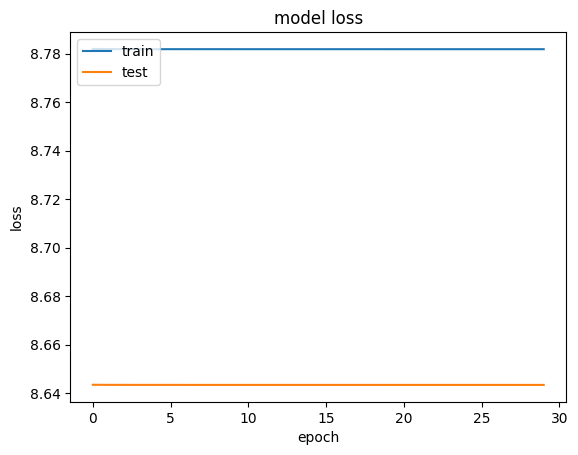

In [58]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [60]:
user_preferences = ['estetik', 'outdoor']
str_user_preferences = ' '.join(user_preferences)

In [61]:
user_vector = tv.transform([str_user_preferences]).toarray()
user_vector.shape

(1, 61)

In [62]:
import numpy as np

city = 'Kota Yogyakarta'
scaled_item_vecs = scaler.transform(user_vector)

input_data = {
    "city": np.array([city]),
    "input_preferences": scaled_item_vecs
}
vms = model_m.predict(scaled_item_vecs)

1/1 [==============================] - 0s 101ms/step


In [63]:
similarities = cosine_similarity(x_train, vms)
sorted_indices = np.argsort(similarities,axis=0)[::-1]

# Retrieve top-k similar places
top_k = 10
top_similar_places = []
cnt = 0

for index in sorted_indices:
  if cnt > top_k:
    break

  place = content_based_data.iloc[index]
  if place.city.values == city:
    top_similar_places.append(place)
    cnt+=1


In [64]:
top_similar_places

[        id  rating             city                name  \
 2051  2051     4.3  Kota Yogyakarta  Desa Wisata Grogol   
 
                                             preferences  
 2051  budaya edukasi kegiatan_rekreasi kenyamanan lo...  ,
         id  rating             city                name  \
 2466  2466     4.5  Kota Yogyakarta  Menoreh Sky Bridge   
 
                                             preferences  
 2466  alam estetik fasilitas foto fotogenik outdoor ...  ,
         id  rating             city          name  \
 1557  1557     4.5  Kota Yogyakarta  Bukit Tompak   
 
                                             preferences  
 1557  estetik fasilitas foto fotogenik outdoor pagi_...  ,
       id  rating             city         name  \
 174  174     4.1  Kota Yogyakarta  Puncak Bucu   
 
                                            preferences  
 174  estetik fasilitas foto fotogenik gunung outdoo...  ,
         id  rating             city          name  \
 1600  1600   

In [65]:
top_similar_places[2].preferences.values

array(['estetik fasilitas foto fotogenik outdoor pagi_hari pemandangan pemandangan_alam relaksasi tempat_bermain tempat_wisata'],
      dtype=object)

## Save model

In [66]:
model_m.save('destination_recommender_model.h5')

## Test Model

In [67]:
# load model
model = tf.keras.models.load_model('destination_recommender_model.h5')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_preferences (InputLay  [(None, 61)]             0         
 er)                                                             
                                                                 
 sequential (Sequential)     (None, 61)                56637     
                                                                 
 tf.math.l2_normalize_1 (TFO  (None, 61)               0         
 pLambda)                                                        
                                                                 
Total params: 56,637
Trainable params: 56,637
Non-trainable params: 0
_________________________________________________________________


In [68]:
user_preferences = ['pantai']
str_user_preferences = ' '.join(user_preferences)

user_vector = tv.transform([str_user_preferences]).toarray()
user_vector.shape

city = 'Kota Jakarta Utara'
scaled_item_vecs = scaler.transform(user_vector)

input_data = {
    "city": np.array([city]),
    "input_preferences": scaled_item_vecs
}
vms = model_m.predict(scaled_item_vecs)

1/1 [==============================] - 0s 32ms/step


In [70]:
dfs['id'] = dfs.index

In [71]:
similarities = cosine_similarity(vectors, vms)
sorted_indices = np.argsort(similarities,axis=0)[::-1]

# Retrieve top-k similar places
top_k = 10
top_similar_places = []
cnt = 0

for index in sorted_indices:
  if cnt > top_k:
    break

  place_id = content_based_data.iloc[index].id.values
  place = dfs[dfs['id']==place_id[0]]
  if place.city.values == city:
    top_similar_places.append(place)
    cnt+=1

In [72]:
json_list = []
for df in top_similar_places:
    print(df)
    json_list.append(df.to_dict(orient='records'))

json_list

                    name                                            map_url  \
2461  Alive Museum Ancol  https://www.google.com/maps/place/Alive+Museum...   

                                                img_url  rating  total_review  \
2461  https://lh5.googleusercontent.com/p/AF1QipOtTn...     4.3        1191.0   

                                                address                city  \
2461  Ancol Beach City Mall, 3rd Floor Jalan Ancol B...  Kota Jakarta Utara   

                                               category  \
2461  {"foto": "43", "mall": "27", "tiket": "22", "3...   

                                                  about  \
2461  {"description": "patung lilin & beberapa tempa...   

                   keyword_category  latitude  longitude    id  
2461  ["tempat wisata", "kegiatan"]  -6.11753    106.857  2461  
                                          name  \
975  Beach City Jakarta (Entertainment Center)   

                                               map

[[{'name': 'Alive Museum Ancol',
   'map_url': 'https://www.google.com/maps/place/Alive+Museum+Ancol/data=!4m7!3m6!1s0x2e6a1e36949400b5:0xbe33342605e95e06!8m2!3d-6.1175344!4d106.857313!16s%2Fg%2F11ddykqtpd!19sChIJtQCUlDYeai4RBl7pBSY0M74?authuser=0&hl=id&rclk=1',
   'img_url': 'https://lh5.googleusercontent.com/p/AF1QipOtTnkvyyCd-pNcztDCOfavuReD9O-JB0xCIO4e=w408-h544-k-no',
   'rating': 4.3,
   'total_review': 1191.0,
   'address': 'Ancol Beach City Mall, 3rd Floor Jalan Ancol Beach City Pademangan, Ancol, Kec. Pademangan, Jkt Utara, Daerah Khusus Ibukota Jakarta 14430',
   'city': 'Kota Jakarta Utara',
   'category': '{"foto": "43", "mall": "27", "tiket": "22", "3d": "20", "lilin": "9", "pantai": "9", "koleksinya": "8", "selfi": "7", "seru": "5", "hiburan": "5"}',
   'about': '{"description": "patung lilin & beberapa tempat berfoto yang memberikan ilusi kepada pengunjung adalah bagian pemandangan unik.", "aksesibilitas": "pintu masuk khusus pengguna kursi roda, toilet khusus pengguna k

In [73]:
json_data = json.dumps(json_list)
json_data

'[[{"name": "Alive Museum Ancol", "map_url": "https://www.google.com/maps/place/Alive+Museum+Ancol/data=!4m7!3m6!1s0x2e6a1e36949400b5:0xbe33342605e95e06!8m2!3d-6.1175344!4d106.857313!16s%2Fg%2F11ddykqtpd!19sChIJtQCUlDYeai4RBl7pBSY0M74?authuser=0&hl=id&rclk=1", "img_url": "https://lh5.googleusercontent.com/p/AF1QipOtTnkvyyCd-pNcztDCOfavuReD9O-JB0xCIO4e=w408-h544-k-no", "rating": 4.3, "total_review": 1191.0, "address": "Ancol Beach City Mall, 3rd Floor Jalan Ancol Beach City Pademangan, Ancol, Kec. Pademangan, Jkt Utara, Daerah Khusus Ibukota Jakarta 14430", "city": "Kota Jakarta Utara", "category": "{\\"foto\\": \\"43\\", \\"mall\\": \\"27\\", \\"tiket\\": \\"22\\", \\"3d\\": \\"20\\", \\"lilin\\": \\"9\\", \\"pantai\\": \\"9\\", \\"koleksinya\\": \\"8\\", \\"selfi\\": \\"7\\", \\"seru\\": \\"5\\", \\"hiburan\\": \\"5\\"}", "about": "{\\"description\\": \\"patung lilin & beberapa tempat berfoto yang memberikan ilusi kepada pengunjung adalah bagian pemandangan unik.\\", \\"aksesibilitas\